In [7]:
def load_news(path):
    with open(path, 'r') as f:
        for line in f:
            splitted_line = line.strip().split('\t')
            news_id, category, subcategory, title, abstract, url, title_entities, abstract_entities = splitted_line
            yield news_id, (category, subcategory, title, abstract, url, title_entities, abstract_entities)


In [4]:
!mkdir dev
!mkdir train
!mv MINDsmall_dev.zip dev
!mv MINDsmall_train.zip train

In [5]:
!cd dev; unzip MINDsmall_dev.zip
!cd train; unzip MINDsmall_train.zip

Archive:  MINDsmall_dev.zip
  inflating: behaviors.tsv           
  inflating: entity_embedding.vec    
  inflating: news.tsv                
  inflating: relation_embedding.vec  
Archive:  MINDsmall_train.zip
  inflating: behaviors.tsv           
  inflating: entity_embedding.vec    
  inflating: news.tsv                
  inflating: relation_embedding.vec  


In [9]:
news_dev = [item[1][2] for item in load_news('dev/news.tsv')]
news_train = [item[1][2] for item in load_news('train/news.tsv')]

In [10]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

tf.Tensor(
[[-0.03133018 -0.06338634 -0.01607501 ... -0.0324278  -0.04575739
   0.05370454]
 [ 0.0508086  -0.01652432  0.01573777 ...  0.00976659  0.03170122
   0.01788118]], shape=(2, 512), dtype=float32)


In [11]:
len(news_dev)

42416

In [12]:
embeddings = embed(news_dev)


In [16]:
import numpy as np

np.save('dev_embeds', embeddings.numpy())

In [17]:
embeddings = embed(news_train)

In [18]:
import numpy as np

np.save('train_embeds', embeddings.numpy())

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

In [20]:
embeds_transformed = pca.fit_transform(embeddings.numpy())

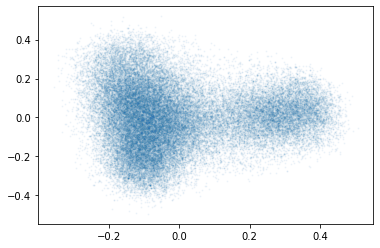

In [24]:
plt.scatter(*embeds_transformed.T, s=1, alpha=0.05)

In [25]:
!zip embeds.zip dev_embeds.npy train_embeds.npy

  adding: dev_embeds.npy (deflated 8%)
  adding: train_embeds.npy (deflated 8%)


In [26]:
!ls -lh

total 352M
drwxr-xr-x 3 root root 4.0K Dec  2 20:37 dev
-rw-r--r-- 1 root root  83M Dec  2 20:41 dev_embeds.npy
-rw-r--r-- 1 root root 169M Dec  2 20:44 embeds.zip
drwxr-xr-x 1 root root 4.0K Dec  1 20:08 sample_data
drwxr-xr-x 2 root root 4.0K Dec  2 20:37 train
-rw-r--r-- 1 root root 101M Dec  2 20:42 train_embeds.npy


In [27]:
!cp embeds.zip drive/MyDrive/